# Course 2-3, part I - Data types and tidy data

## Tidy data (see [here](https://vita.had.co.nz/papers/tidy-data.pdf) for more details)

This is one of the non-tidy dataset assembled by Hadley Wickham (check out [here](https://github.com/tidyverse/tidyr/tree/master/vignettes) for more datasets, explanation, and R code). 

Let's take a look at this small dataset: https://raw.githubusercontent.com/tidyverse/tidyr/4c0a8d0fdb9372302fcc57ad995d57a43d9e4337/vignettes/pew.csv

In [1]:
import pandas as pd

In [2]:
pew_df = pd.read_csv('https://raw.githubusercontent.com/tidyverse/tidyr/4c0a8d0fdb9372302fcc57ad995d57a43d9e4337/vignettes/pew.csv')
pew_df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


This dataset is about the relationships between income and religion, assembled from a research by the Pew Research Center. You can read more details [here](https://github.com/tidyverse/tidyr/blob/master/vignettes/tidy-data.Rmd#column-headers-are-values-not-variable-names). Is this dataset tidy or not? Why?

Yes, many of the columns are values, not variable names. How should we fix it? 

Pandas provides a convenient function called [melt](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html). You specify the `id_vars` that are variable columns, and `value_vars` that are value columns, and provide the name for the variable as well as the name for the values. 

**Q: so please go ahead and tidy it up! I'd suggest to use the variable name "income" and value name "frequency"**

In [3]:
# TODO
list(pew_df.columns.values[1:])

['<$10k',
 '$10-20k',
 '$20-30k',
 '$30-40k',
 '$40-50k',
 '$50-75k',
 '$75-100k',
 '$100-150k',
 '>150k',
 "Don't know/refused"]

In [4]:
# TODO: put your code here
pew_tidy_df = pd.melt(pew_df, id_vars=['religion'], value_vars=list(pew_df.columns.values[1:]),
        var_name=['income'], value_name='frequency')

If you were successful, you'll have something like this:

In [5]:
pew_tidy_df.sample(10)

,religion,income,frequency
91,Atheist,$50-75k,70
49,Orthodox,$20-30k,23
11,Mormon,<$10k,29
104,Other Christian,$50-75k,14
38,Buddhist,$20-30k,30
99,Jewish,$50-75k,95
71,Unaffiliated,$30-40k,365
100,Mainline Prot,$50-75k,1107
30,Muslim,$10-20k,7
157,Orthodox,>150k,46


## Data types

Let's talk about data types briefly. Understanding data types is not only important for choosing the right visualizations, but also important for efficient computing and storage of data. A Pandas `Dataframe` is essentially a bunch of `Series`, and those `Series` are essentially `numpy` arrays. An array may contain a fixed-length items such as integers or variable length items such as strings. Putting some efforts to think about the correct data type can potentially save a lot of memory as well as time. 

A nice example would be the categorical data type. If you have a variable that only has several possible values, it's essentially a categorical data. Take a look at the `income` variable. 

In [6]:
pew_tidy_df.income.value_counts()

<$10k                 18
$10-20k               18
$20-30k               18
$30-40k               18
$40-50k               18
$50-75k               18
$75-100k              18
$100-150k             18
>150k                 18
Don't know/refused    18
Name: income, dtype: int64

These were the column names in the original non-tidy data. The value can take only one of these income ranges and thus it is a categorical data. What is the data type that pandas use to store this column?

In [7]:
pew_tidy_df.income.dtype

dtype('O')

The `O` means that it is an object data type, which does not have a fixed size like integer or float. The series contains a sort of pointer to the actual text objects. You can actually inspect the amount of memory used by the dataset. 

In [8]:
pew_tidy_df.memory_usage()

Index         128
religion     1440
income       1440
frequency    1440
dtype: int64

In [9]:
pew_tidy_df.memory_usage(deep=True)

Index          128
religion     12780
income       11700
frequency     1440
dtype: int64

When you don't specify `deep=True`, the memory usage method just tells you the amount of memory used by the numpy arrays in the pandas dataframe. When you pass `deep=True`, it tells you the total amount of memory by including the memory used by all the text objects. So, the `religion` and `income` columns occupies almost ten times of memory than the `frequency` column, which is simply an array of integers. 

In [10]:
pew_tidy_df.frequency.dtype

dtype('int64')

Is there any way to save up the memory? Note that there are only 10 categories in the income variable. That means we just need 10 numbers to represent the categories! Of course we need to store the names of each category, but that's just one-time cost. The simplest way to convert a column is using `astype` method. 

In [11]:
income_categorical_series = pew_tidy_df.income.astype('category')
# you can do pew_tidy_df.income = pew_tidy_df.income.astype('category')

Now, this series has the `CategoricalDtype` dtype. 

In [12]:
income_categorical_series.dtype

CategoricalDtype(categories=['$10-20k', '$100-150k', '$20-30k', '$30-40k', '$40-50k',
                  '$50-75k', '$75-100k', '<$10k', '>150k',
                  'Don't know/refused'],
, ordered=False)

How much memory do we use?

In [13]:
income_categorical_series.memory_usage(deep=True)

1258

In [14]:
pew_tidy_df.income.memory_usage(deep=True)

11828

We have reduced the memory usage by almost 10 fold! Not only that, because now the values are just numbers, it will be much faster to match, filter, manipulate. If your dataset is huge, this can save up a lot of space and time. 

If the categories have ordering, you can specify the ordering too. 

In [15]:
from pandas.api.types import CategoricalDtype
income_type = CategoricalDtype(categories=["Don't know/refused", '<$10k', '$10-20k', '$20-30k', '$30-40k', 
                                           '$40-50k', '$50-75k', '$75-100k', '$100-150k', '>150k'], ordered=True)
income_type

CategoricalDtype(categories=['Don't know/refused', '<$10k', '$10-20k', '$20-30k',
                  '$30-40k', '$40-50k', '$50-75k', '$75-100k', '$100-150k',
                  '>150k'],
, ordered=True)

In [16]:
pew_tidy_df.income.astype(income_type).dtype

CategoricalDtype(categories=['Don't know/refused', '<$10k', '$10-20k', '$20-30k',
                  '$30-40k', '$40-50k', '$50-75k', '$75-100k', '$100-150k',
                  '>150k'],
, ordered=True)

This data type now allows you to compare and sort based on the ordering. 

**Q: ok, now convert both religion and income columns of `pew_tidy_df` as categorical dtype (in place) and show that `pew_tidy_df` now uses much less memory**

In [17]:
# TODO: put your code here
pew_tidy_df.religion = pew_tidy_df.religion.astype('category')
pew_tidy_df.income = pew_tidy_df.income.astype('category')
pew_tidy_df.memory_usage(deep=True)

Index         128
religion     2035
income       1130
frequency    1440
dtype: int64

## Other resources on tidy data in python

- [Jean-Nicholas Hould: Tidy Data in Python](http://www.jeannicholashould.com/tidy-data-in-python.html)

# Part II - 1D data

First import basic packages and then load a dataset from `vega_datasets` package. If you don't have `vega_datasets` or `altair` installed yet, use `pip` or `conda` to install them. 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

In [19]:
cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## 1D scatter plot

Let's consider the `Acceleration` column as our 1D data. If we ask pandas to plot this series, it'll produce a line graph where the index becomes the horizontal axis. 

<AxesSubplot: >

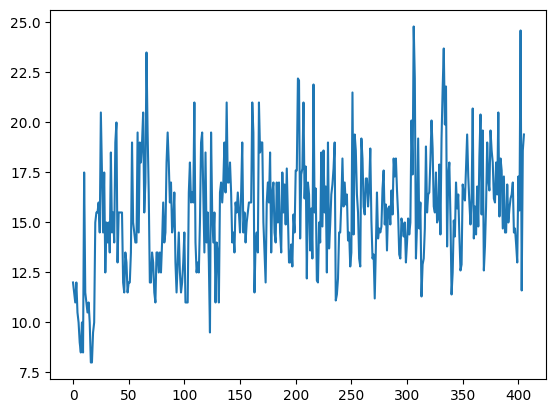

In [20]:
cars.Acceleration.plot()

Because the index is not really meaningful, drawing line between subsequent values is __misleading__! 

It's not trivial to use pandas to create a 1-D scatter plot. Instead, we can use `matploblib`'s `scatter` function. We can first create an array with zeros that we can use as the vertical coordinates of the points that we will plot.  `np.zeros_like` returns an array with zeros that matches the shape of the input array. 

In [21]:
np.zeros_like([1,2,3])

array([0, 0, 0])

**Q: now can you create an 1D scatter plot wit `matplotlib`'s scatter function?** Make the figure wide (e.g. set `figsize=(10,2)`) and then remove the y tics. 

[]

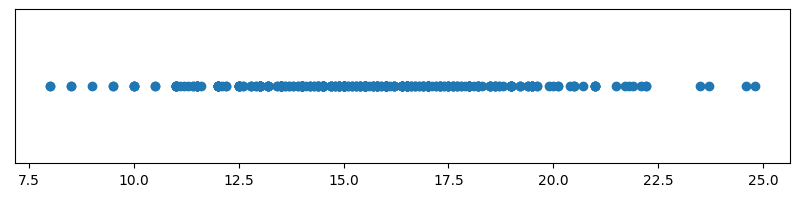

In [36]:
# TODO: put your code here
plt.figure(figsize=(10,2))
plt.yticks([])
plt.scatter(cars.Acceleration, [0] * cars.Acceleration.shape[0])
plt.plot()


As you can see, there are lots of occlusions. So this plot cannot show the distribution properly and we would like to fix it. How about adding some jitters? You can use `numpy`'s `random.rand()` function to generate random numbers, instead of using an array with zeros. 

**Q: create a jittered 1D scatter plot.**

[]

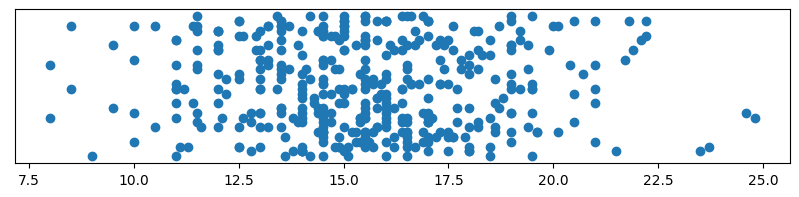

In [71]:
# TODO: put your code here
jittered_y = np.random.randint(30, size=len(cars.Acceleration))
plt.figure(figsize=(10,2))
plt.yticks([])
plt.scatter(cars.Acceleration, jittered_y)
plt.plot()


We can further improve this by adding transparency to the symbols. The transparency option for `scatter` function is called `alpha`. Set it to be 0.2.

**Q: create a jittered 1D scatter plot with transparency (alpha=0.2)**

[]

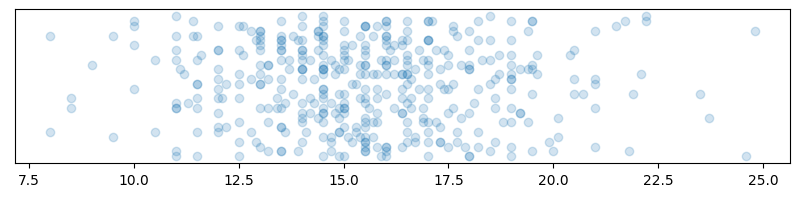

In [72]:
# TODO: put your code here
jittered_y = np.random.randint(30, size=len(cars.Acceleration))
plt.figure(figsize=(10,2))
plt.yticks([])
plt.scatter(cars.Acceleration, jittered_y, alpha=0.2)
plt.plot()

Another strategy is using empty symbols. The option is `facecolors`. You can also change the stroke color (`edgecolors`). 

**Q: create a jittered 1D scatter plot with empty symbols.**

[]

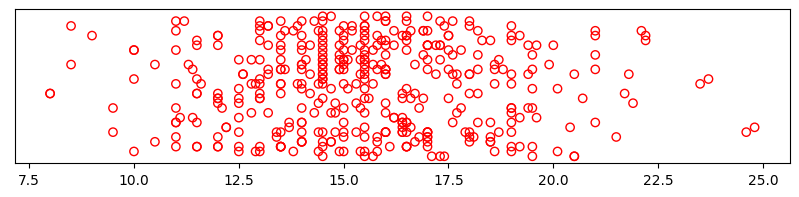

In [79]:
# TODO: put your code here
jittered_y = np.random.randint(30, size=len(cars.Acceleration))
plt.figure(figsize=(10,2))
plt.yticks([])
plt.scatter(cars.Acceleration, jittered_y, facecolors='none',edgecolors='r')
plt.plot()

## What happens if you have lots and lots of points?

Whatever strategy that you use, it's almost useless if you have too many data points. Let's play with different number of data points and see how it looks. 

It not only becomes completely useless, it also take a while to draw the plot itself. 

[]

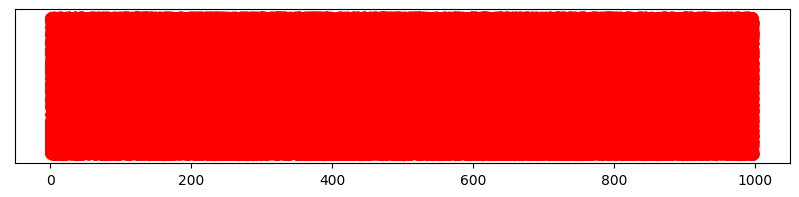

In [91]:
# TODO: play with N and see what happens. 
jittered_y = np.random.randint(0, 1000, size=100000)
x = np.random.randint(0, 1000, size=100000)
plt.figure(figsize=(10,2))
plt.yticks([])
plt.scatter(x, jittered_y, facecolors='none',edgecolors='r')
plt.plot()

## Histogram and boxplot

When you have lots of data points, you no longer whant to use the scatter plots. Even when you don't have millions of data points, you often want to get a quick summary of the distribution rather than seeing the whole dataset. For 1-D datasets, two major approaches are histogram and boxplot. A histogram is about aggregating and counting the data while a boxplot is about summarizing the data. Let's first draw some histograms. 

### Histogram

It's very easy to draw a histogram with pandas. 

<AxesSubplot: >

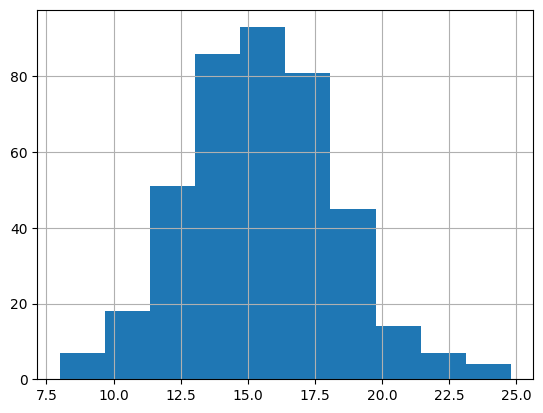

In [92]:
cars.Acceleration.hist()

You can adjust the bin size, which is the main parameter of the histogram. 

<AxesSubplot: >

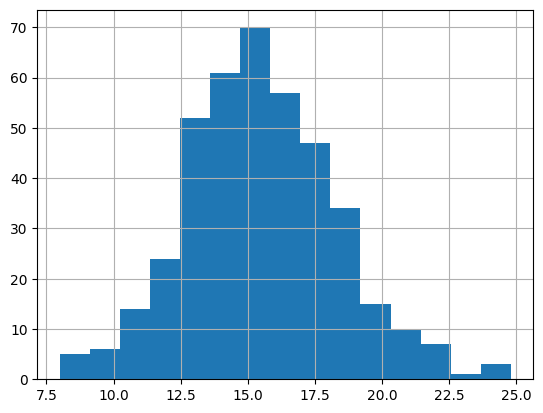

In [93]:
cars.Acceleration.hist(bins=15)

You can even specify the actual bins. 

<AxesSubplot: >

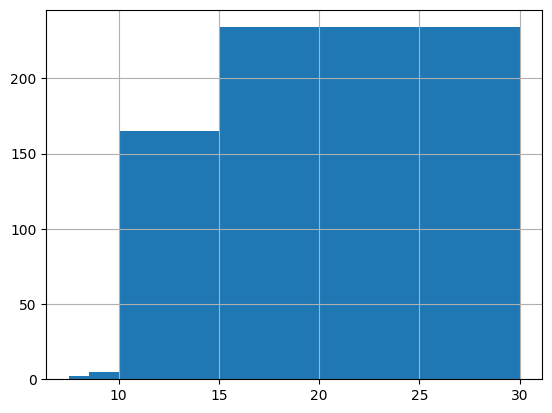

In [94]:
bins = [7.5, 8.5, 10, 15, 30]
cars.Acceleration.hist(bins=bins)

Do you see anything funky going on with this histogram? What's wrong? Can you fix it? 

**Q: Explain what's wrong with this histogram and fix it.** 

[Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) does not show the option that you should use. You should take a look at the `matplotlib`'s documentation.  

<AxesSubplot: >

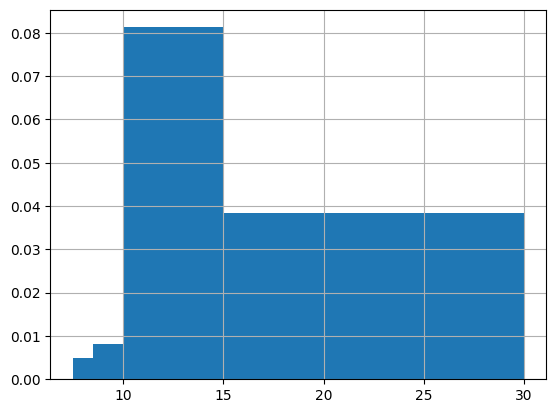

In [101]:
# TODO
# Id does not take into account the width of the bins, so we end up with interval 15 -> 30 way too big

bins = [7.5, 8.5, 10, 15, 30]
cars.Acceleration.hist(bins=bins, density=True)

### Boxplot

Boxplot can be created with pandas very easily. Check out the `plot` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html 

**Q: create a box plot of `Acceleration`**

{'whiskers': [<matplotlib.lines.Line2D at 0x1760cb0f100>,
 'caps': [<matplotlib.lines.Line2D at 0x1760cb9c2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1760cb0fdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1760cb9cb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1760cb9c8b0>],
 'means': []}

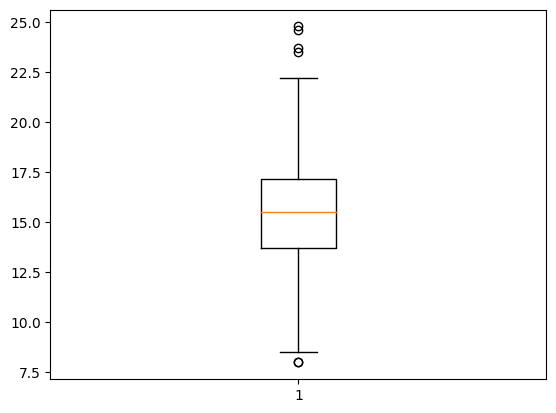

In [103]:
# TODO: put your code here. 
plt.boxplot(cars.Acceleration)

## 1D scatter plot with Seaborn and Altair

As you may have noticed, it is not very easy to use `matplotlib`. The organization of plot functions and parameters are not very systematic. Whenever you draw something, you should search how to do it, what are the parameters you can tweak, etc. You need to manually tweak a lot of things when you work with `matplotlib`. 

There are more systematic approaches towards data visualization, such as the "[Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448)". This idea of *grammar* led to the famous `ggplot2` (http://ggplot2.tidyverse.org) package in R as well as the [Vega & Vega-lite]((https://vega.github.io)) for the web. The grammar-based approach lets you work with *tidy data* in a natural way, and also lets you approach the data visualization systematically.

Let's introduce two nice Python libraries. One is called `seaborn` (https://seaborn.pydata.org), which is focused on creating complex statistical data visualizations, and the other is called `altair` (https://altair-viz.github.io/) and it is a Python library that lets you *define* a visualization and translates it into vega-lite json. 

Seaborn would be useful when you are doing exploratory data analysis; altair may be useful if you are thinking about creating and putting an interactive visualization on the web. 

If you don't have them yet, check the [installation page of altair](https://altair-viz.github.io/getting_started/installation.html). In `conda`, 

    $ conda install -c conda-forge altair vega_datasets jupyterlab 

Let's play with it. 

In [106]:
import seaborn as sns
import altair as alt

# Uncomment the following line if you are using Jupyter notebook
# alt.renderers.enable('notebook')

In [107]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


### Beeswarm plots with seaborn 

Seaborn has a built-in function to create 1D scatter plots with multiple categories, and it adds jittering by default.

<AxesSubplot: xlabel='Origin', ylabel='Acceleration'>

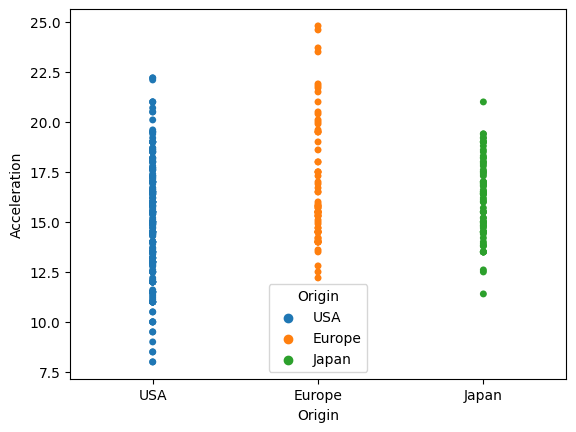

In [109]:
sns.stripplot(x='Origin', y='Acceleration', data=cars, jitter=False, hue="Origin")

And you can easily add jitters or even create a beeswarm plot. 

<AxesSubplot: xlabel='Origin', ylabel='Acceleration'>

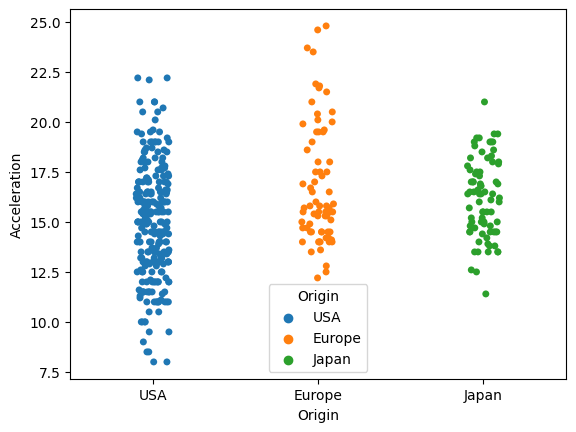

In [110]:
sns.stripplot(x='Origin', y='Acceleration', data=cars, hue='Origin')

Seems like European cars tend to have good acceleration. Let's look at the beeswarm plot, which is a pretty nice option for fairly small datasets. 

<AxesSubplot: xlabel='Origin', ylabel='Acceleration'>

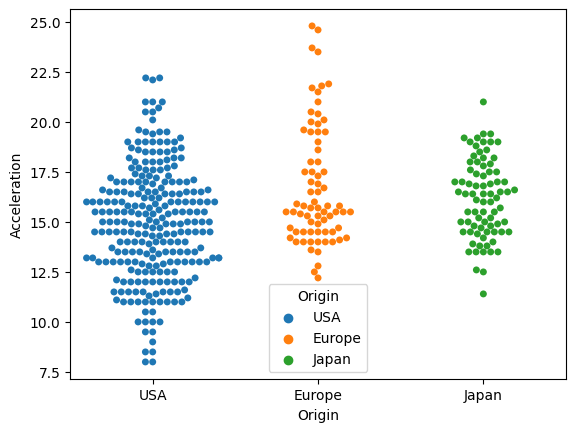

In [111]:
sns.swarmplot(x='Origin', y='Acceleration', data=cars, hue='Origin')

Seaborn also allows you to use colors for another categorical variable. The option is `hue`.  

**Q: can you create a beeswarm plot where the swarms are grouped by `Cylinders`, y-values are `Acceleration`, and colors represent the `Origin`?**

c:\Users\Viniele\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Cylinders', ylabel='Acceleration'>

c:\Users\Viniele\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Viniele\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Viniele\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


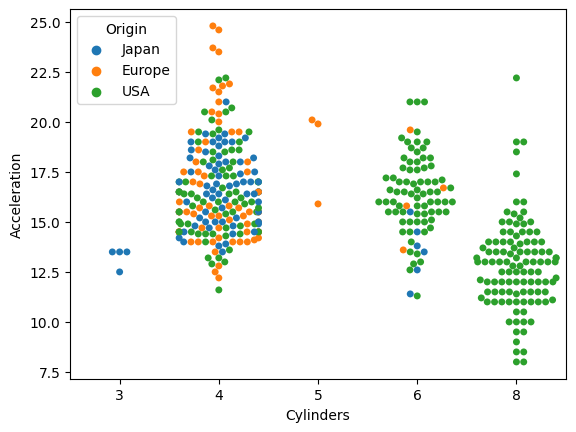

In [112]:
# TODO: put your code here
sns.swarmplot(x='Cylinders', y='Acceleration', data=cars, hue='Origin')

And of course you can create box plots too. 

**Q: Create boxplots to show the relationships between `Cylinders` and `Acceleration`. **


<AxesSubplot: xlabel='Cylinders', ylabel='Acceleration'>

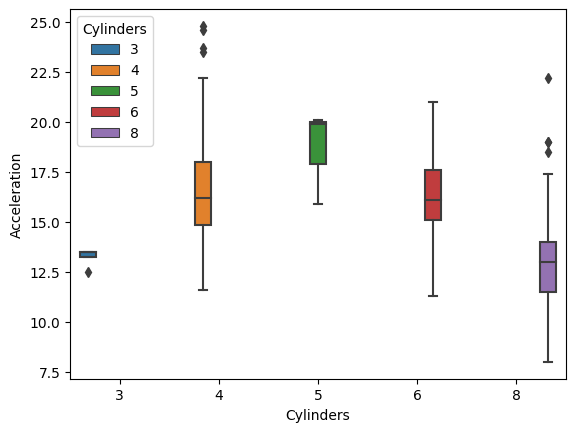

In [115]:
# TODO: put your code here
sns.boxplot(x='Cylinders', y='Acceleration', data=cars, hue='Cylinders')

### Altair basics

With `altair`, you're thinking in terms of a whole dataframe, rather than vectors for x or vectors for y. Passing the dataset to `Chart` creates an empty plot. If you try to run `alt.Chart(cars)`, it will complain. You need to say what's the visual encoding of the data. 

In [116]:
alt.Chart(cars)

SchemaValidationError: Invalid specification

        altair.vegalite.v4.api.Chart, validating 'required'

        'mark' is a required property
        

alt.Chart(...)

**Note**: If the altair plots don't show properly, use one of the following lines depending on your environment. Also check out the troubleshooting document [here](https://altair-viz.github.io/user_guide/troubleshooting.html). 

In [122]:
# alt.renderers.enable('notebook')
alt.renderers.enable('jupyterlab')
# alt.renderers.enable('default')

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [123]:
alt.Chart(cars).mark_point()

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


So you just see one *point*. But actually this is not a single point. This is every row of the dataset represented as a point at the same location. Because there is no specification about where to put the points, it simply draws everything on top of each other. Let's specify how to spread them across the horizontal axis. 

In [124]:
alt.Chart(cars).mark_point().encode(
    x='Acceleration',
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


This is called the "short form", and it is a simplified version of the "long form", while the long form allows more fine tuning. For this plot, they are equivalent:

In [125]:
alt.Chart(cars).mark_point().encode(
    x=alt.X('Acceleration')
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


There is another nice mark called `tick`:

In [126]:
alt.Chart(cars).mark_tick().encode(
    x='Acceleration',
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In `altair`, histogram is not a special type of visualization, but simply a plot with bars where a variable is binned and a counting aggregation function is used. 

In [127]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Acceleration', bin=True),
    y='count()'
) 

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


**Q: can you create a 2D scatterplot with `Acceleration` and `Horsepower`? Use `Origin` for the colors.**

In [133]:
# TODO: put your code here
chart = alt.Chart(cars).mark_point().encode(
    x='Acceleration',
    y='Horsepower',
    color='Origin',
).interactive()

chart

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Because altair/vega-lite/vega are essentially drawing the chart using javascript (and D3.js), it is very easy to export it on the web. Probably the simplest way is just exporting it into an HTML file: https://altair-viz.github.io/getting_started/starting.html#publishing-your-visualization

**Save the chart to m07.html and upload it too.** 

In [134]:
# TODO: your code here. 
chart.save('chart.html')

# Part III -  Histogram and CDF

A deep dive into Histogram and boxplot.

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import pandas as pd

In [136]:
import matplotlib
matplotlib.__version__

'3.6.2'

## The tricky histogram with pre-counted data

Let's consider the table 

| Hours | Frequency |
|-------|-----------|
| 0-1   | 4,300     |
| 1-3   | 6,900     |
| 3-5   | 4,900     |
| 5-10  | 2,000     |
| 10-24 | 2,100     |

You can draw a histogram by just providing bins and counts instead of a list of numbers. So, let's try that. 

In [137]:
bins = [0, 1, 3, 5, 10, 24]
data = {0.5: 4300, 2: 6900, 4: 4900, 7: 2000, 15: 2100} 

In [138]:
data.keys()

dict_keys([0.5, 2, 4, 7, 15])

**Q: Draw histogram using this data.** Useful query: [Google search: matplotlib histogram pre-counted](https://www.google.com/search?client=safari&rls=en&q=matplotlib+histogram+already+counted&ie=UTF-8&oe=UTF-8#q=matplotlib+histogram+pre-counted)

(array([4300., 6900., 4900., 2000., 2100.]),
 array([ 0.,  1.,  3.,  5., 10., 24.]),
 <BarContainer object of 5 artists>)

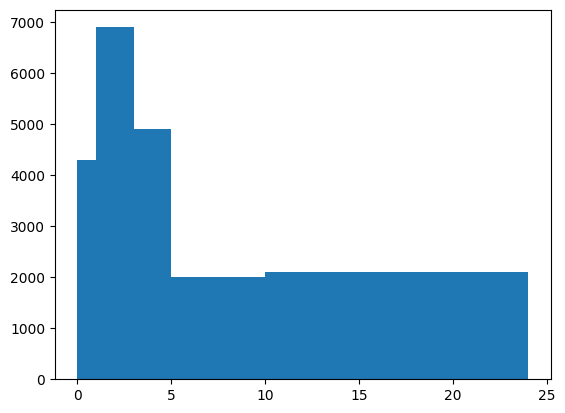

In [142]:
# TODO: draw a histogram with weighted data. 
val, weight = zip(*[(k, v) for k,v in data.items()])
plt.hist(val, weights=weight, bins=bins)

As you can see, the **default histogram does not normalize with binwidth and simply shows the counts**! This can be very misleading if you are working with variable bin width (e.g. logarithmic bins). So please be mindful about histograms when you work with variable bins. 

**Q: You can fix this by using the `density` option.**

(array([0.21287129, 0.17079208, 0.12128713, 0.01980198, 0.00742574]),
 array([ 0.,  1.,  3.,  5., 10., 24.]),
 <BarContainer object of 5 artists>)

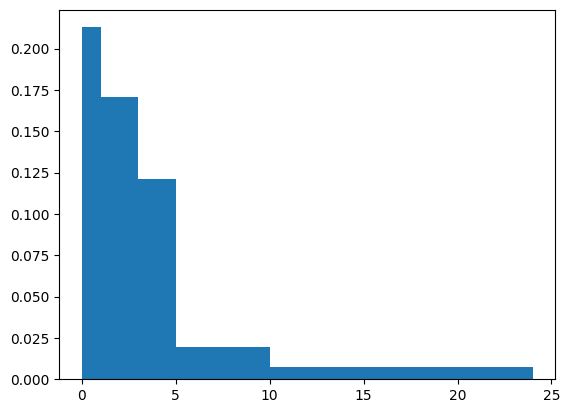

In [143]:
# TODO: fix it with density option. 
val, weight = zip(*[(k, v) for k,v in data.items()])
plt.hist(val, weights=weight, bins=bins, density=True)

## Let's use an actual dataset

In [144]:
import vega_datasets

In [145]:
vega_datasets.__version__

'0.9.0'

**Note:** Please check your `vega_datasets` version using `vega_datasets.__version__`. If you have a version lower than `0.9.0`, you will need to check the column names in `movies.head()` and update it accordingly in the code cells below.

In [146]:
movies = vega_datasets.data.movies()
movies.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


Let's plot the histogram of IMDB ratings. 

(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <BarContainer object of 10 artists>)

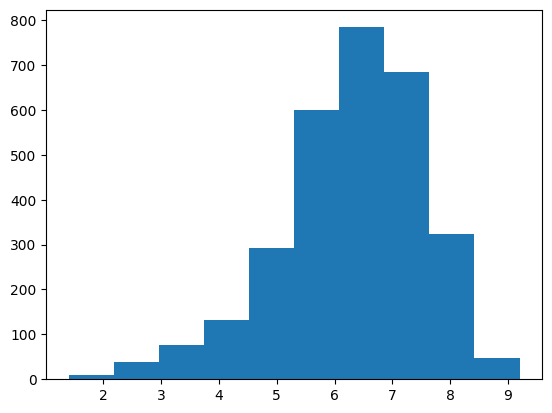

In [147]:
plt.hist(movies['IMDB_Rating'])

Did you get an error or a warning? What's going on? 

The problem is that the column contains `NaN` (Not a Number) values, which represent missing data points. The following command check whether each value is a `NaN` and returns the result. 

In [148]:
movies['IMDB_Rating'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
3196    False
3197     True
3198    False
3199    False
3200    False
Name: IMDB_Rating, Length: 3201, dtype: bool

As you can see there are a bunch of missing rows. You can count them. 

In [149]:
sum(movies['IMDB_Rating'].isna())

213

or drop them. 

In [150]:
IMDB_ratings_nan_dropped = movies['IMDB_Rating'].dropna()
len(IMDB_ratings_nan_dropped)

2988

In [151]:
213 + 2988

3201

The `dropna` can be applied to the dataframe too. 

**Q: drop rows from `movies` dataframe where either `IMDB_Rating` or `IMDB_Votes` is `NaN`.**

In [152]:
# TODO
movies = movies.dropna(subset=['IMDB_Rating', 'IMDB_Votes'])

In [153]:
# Both should be zero. 
print(sum(movies['IMDB_Rating'].isna()), sum(movies['IMDB_Votes'].isna()))

0 0


How does `matplotlib` decides the bins? Actually `matplotlib`'s `hist` function uses `numpy`'s `histogram` function under the hood. 

**Q: Plot the histogram of movie ratings (`IMDB_Rating`) using the `plt.hist()` function.**

(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <BarContainer object of 10 artists>)

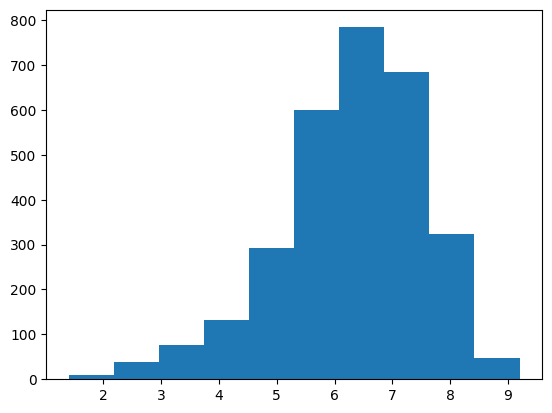

In [154]:
# TODO
plt.hist(movies['IMDB_Rating'])

Have you noticed that this function returns three objects? Take a look at the documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) to figure out what they are.

To get the returned three objects:

[  9.  39.  76. 133. 293. 599. 784. 684. 323.  48.]
[1.4  2.18 2.96 3.74 4.52 5.3  6.08 6.86 7.64 8.42 9.2 ]


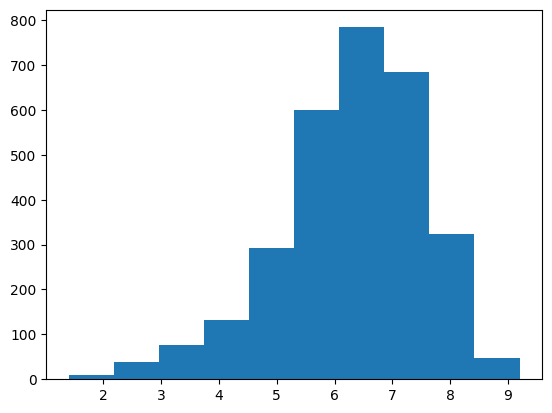

In [155]:
n_raw, bins_raw, patches = plt.hist(movies['IMDB_Rating'])
print(n_raw)
print(bins_raw)

Here, `n_raw` contains the values of histograms, i.e., the number of movies in each of the 10 bins. Thus, the sum of the elements in `n_raw` should be equal to the total number of movies. 

**Q: Test whether the sum of values in `n_raw` is equal to the number of movies in the `movies` dataset**

In [158]:
# TODO: test whether the sum of the numbers in n_raw is equal to the number of movies. 
print(sum(n_raw) == len(movies))
sum(n_raw), len(movies)

True


(2988.0, 2988)

The second returned object (`bins_raw`) is a list containing the edges of the 10 bins: the first bin is \[1.4, 2.18\], the second \[2.18, 2.96\], and so on. What's the width of the bins?

In [159]:
np.diff(bins_raw)

array([0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78])

The width is same as the maximum value minus minimum value, divided by 10. 

In [160]:
min_rating = min(movies['IMDB_Rating'])
max_rating = max(movies['IMDB_Rating'])
print(min_rating, max_rating)
print( (max_rating-min_rating) / 10 )

1.4 9.2
0.7799999999999999


Now, let's plot a normalized (density) histogram. 

[0.0038616  0.0167336  0.03260907 0.05706587 0.12571654 0.25701095
 0.33638829 0.29348162 0.13858854 0.0205952 ]
[1.4  2.18 2.96 3.74 4.52 5.3  6.08 6.86 7.64 8.42 9.2 ]


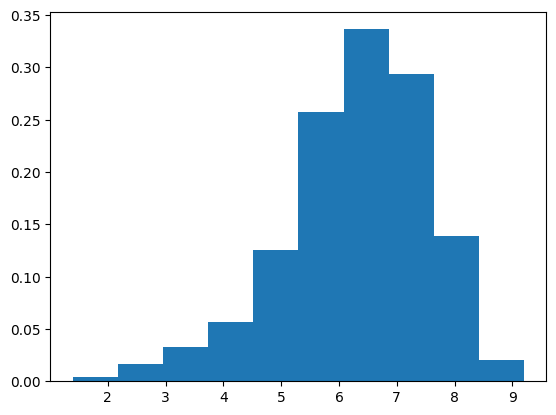

In [161]:
n, bins, patches = plt.hist(movies['IMDB_Rating'], density=True)
print(n)
print(bins)

The ten bins do not change. But now `n` represents the density of the data inside each bin. In other words, the sum of the area of each bar will equal to 1. 

**Q: Can you verify this?**

Hint: the area of each bar is calculated as height * width. You may get something like 0.99999999999999978 instead of 1.

In [165]:
# TODO
for idx in range(10):
    print(n[idx]*bins[idx])

0.005406240345999383
0.03647925033467201
0.09652284351079533
0.2134263549926201
0.5682387670339482
1.3621580338447787
2.045240792228746
2.013283904850171
1.0588164624309186
0.17341159509834225


Anyway, these data generated from the `hist` function is calculated from `numpy`'s `histogram` function. https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html 

Note that the result of `np.histogram()` is same as that of `plt.hist()`. 

In [166]:
np.histogram(movies['IMDB_Rating'])

(array([  9,  39,  76, 133, 293, 599, 784, 684, 323,  48], dtype=int64),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]))

(array([  9.,  39.,  76., 133., 293., 599., 784., 684., 323.,  48.]),
 array([1.4 , 2.18, 2.96, 3.74, 4.52, 5.3 , 6.08, 6.86, 7.64, 8.42, 9.2 ]),
 <BarContainer object of 10 artists>)

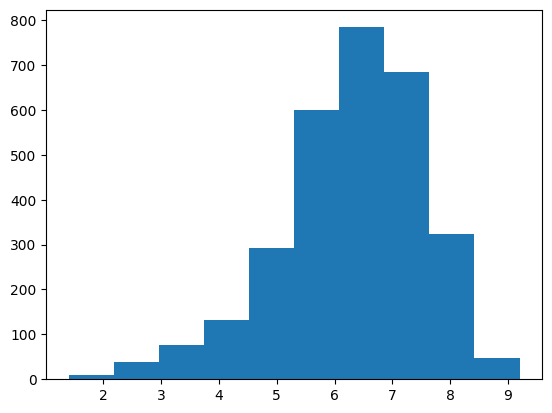

In [167]:
plt.hist(movies['IMDB_Rating'])

If you look at the documentation, you can see that `numpy` uses simply 10 as the default number of bins. But you can set it manually or set it to be `auto`, which is the "Maximum of the `sturges` and `fd` estimators.". Let's try this `auto` option. 

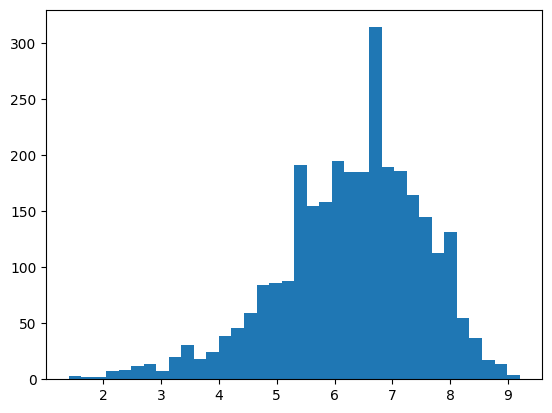

In [168]:
_ = plt.hist(movies['IMDB_Rating'], bins='auto')

## Consequences of the binning parameter

Let's explore the effect of bin size using small multiples. In `matplotlib`, you can use [subplot](https://www.google.com/search?client=safari&rls=en&q=matplotlib+subplot&ie=UTF-8&oe=UTF-8) to put multiple plots into a single figure. 

For instance, you can do something like:

<AxesSubplot: >

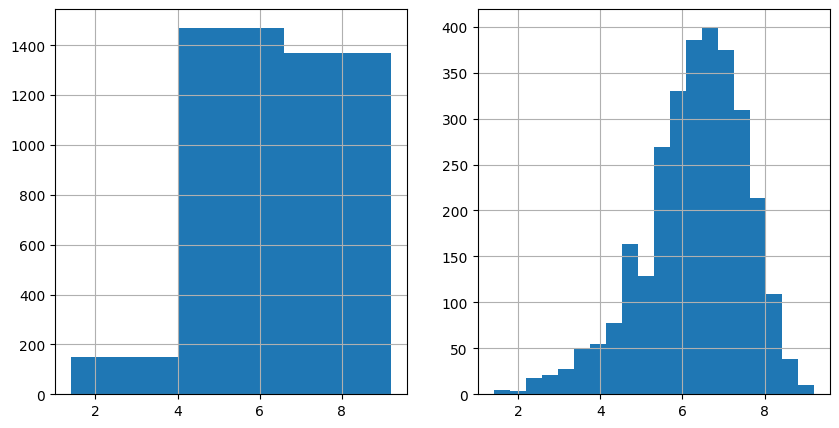

In [169]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
movies['IMDB_Rating'].hist(bins=3)
plt.subplot(1,2,2)
movies['IMDB_Rating'].hist(bins=20)

**Q: create 8 subplots (2 rows and 4 columns) with the following `binsizes`.**

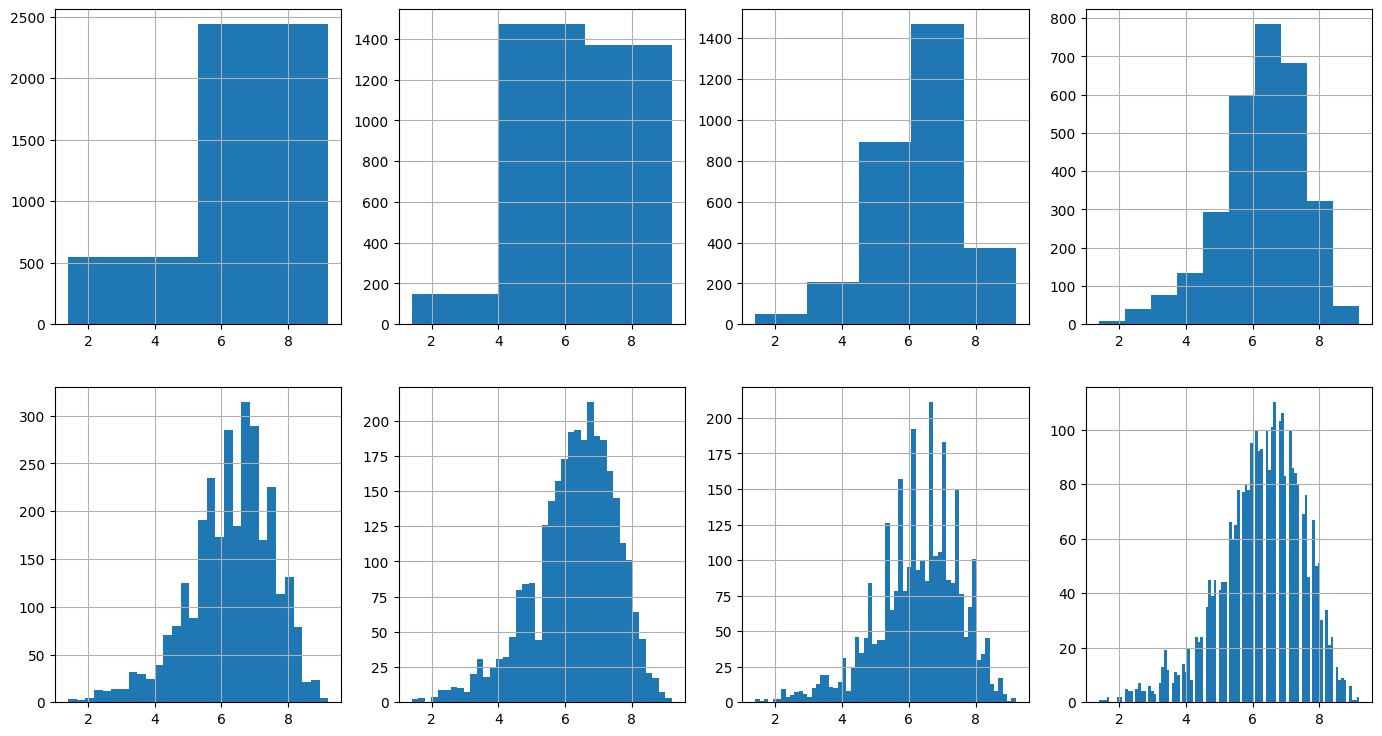

In [175]:
nbins = [2, 3, 5, 10, 30, 40, 60, 100 ]
figsize = (18, 10)

# TODO
plt.figure(figsize=(17,9))
for fig_idx in range(8):
    plt.subplot(2,4,fig_idx+1)
    movies['IMDB_Rating'].hist(bins=nbins[fig_idx])

Do you see the issues with having too few bins or too many bins? In particular, do you notice weird patterns that emerge from `bins=30`? 

**Q: Can you guess why do you see such patterns? What are the peaks and what are the empty bars? What do they tell you about choosing the binsize in histograms?**

<AxesSubplot: >

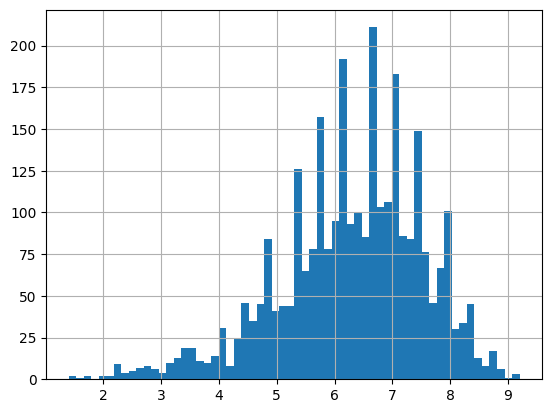

In [176]:
# TODO: Provide your answer and evidence here
# bin interval gets too narow and we end up not having eaxt small values to fit in the gaps, so an obvious gap is created
movies['IMDB_Rating'].hist(bins=60)

## Formulae for choosing the number of bins. 

We can manually choose the number of bins based on those formulae. 

<AxesSubplot: title={'center': 'F-D, 35 bins'}>

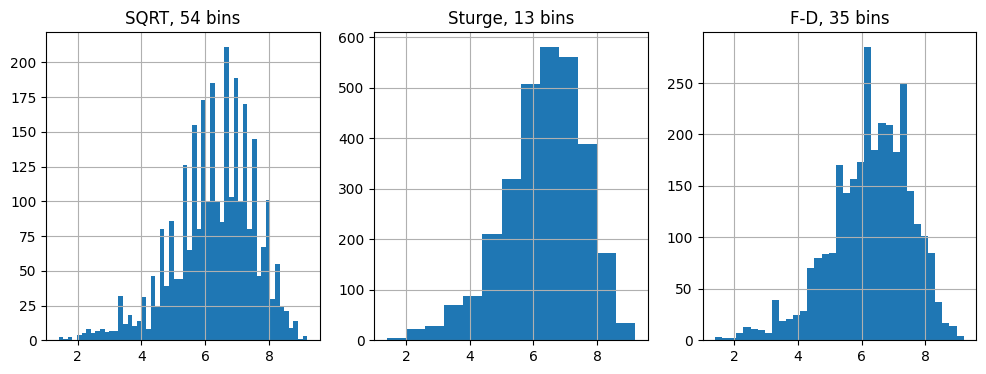

In [177]:
N = len(movies)

plt.figure(figsize=(12,4))

# Sqrt 
nbins = int(np.sqrt(N))

plt.subplot(1,3,1)
plt.title("SQRT, {} bins".format(nbins))
movies['IMDB_Rating'].hist(bins=nbins)

# Sturge's formula
nbins = int(np.ceil(np.log2(N) + 1))

plt.subplot(1,3,2)
plt.title("Sturge, {} bins".format(nbins))
movies['IMDB_Rating'].hist(bins=nbins)

# Freedman-Diaconis
iqr = np.percentile(movies['IMDB_Rating'], 75) - np.percentile(movies['IMDB_Rating'], 25)
width = 2*iqr/np.power(N, 1/3)
nbins = int((max(movies['IMDB_Rating']) - min(movies['IMDB_Rating'])) / width)

plt.subplot(1,3,3)
plt.title("F-D, {} bins".format(nbins))
movies['IMDB_Rating'].hist(bins=nbins)



But we can also use built-in formulae too. Let's try all of them. 

<AxesSubplot: >

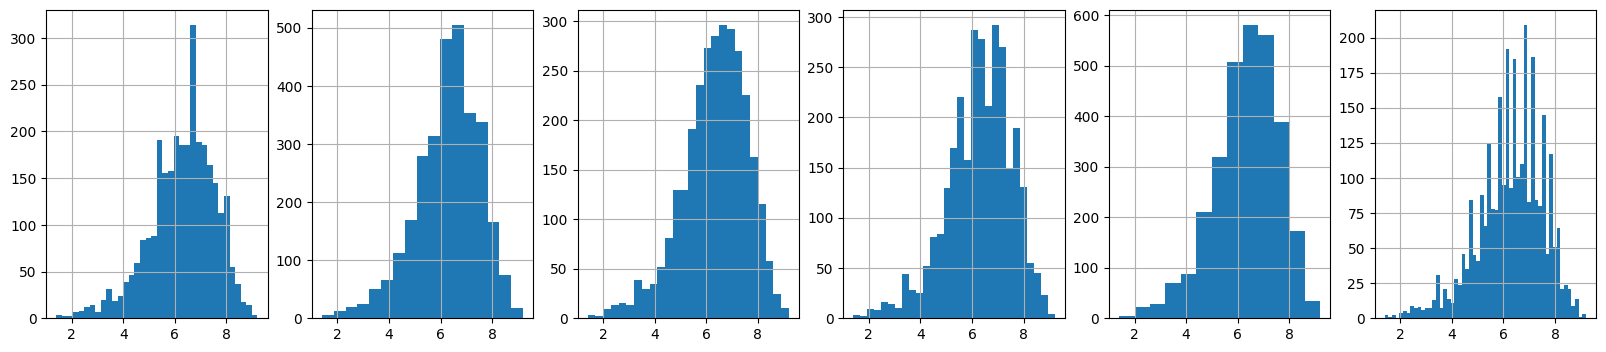

In [178]:
plt.figure(figsize=(20,4))

plt.subplot(161)
movies['IMDB_Rating'].hist(bins='fd')

plt.subplot(162)
movies['IMDB_Rating'].hist(bins='doane')

plt.subplot(163)
movies['IMDB_Rating'].hist(bins='scott')

plt.subplot(164)
movies['IMDB_Rating'].hist(bins='rice')

plt.subplot(165)
movies['IMDB_Rating'].hist(bins='sturges')

plt.subplot(166)
movies['IMDB_Rating'].hist(bins='sqrt')

Some are decent, but several of them tend to overestimate the good number of bins. As you have more data points, some of the formulae may overestimate the necessary number of bins. Particularly in our case, because of the precision issue, we shouldn't increase the number of bins too much.

### Then, how should we choose the number of bins?

So what's the conclusion? use Scott's rule or Sturges' formula? 

No, I think the take-away is that you **should understand how the inappropriate number of bins can mislead you** and you should **try multiple number of bins** to obtain the most accurate picture of the data. Although the 'default' may work in most cases, don't blindly trust it! Don't judge the distribution of a dataset based on a single histogram. Try multiple parameters to get the full picture!

## CDF (Cumulative distribution function)

Drawing a CDF is easy. Because it's very common data visualization, histogram has an option called `cumulative`. 

<AxesSubplot: >

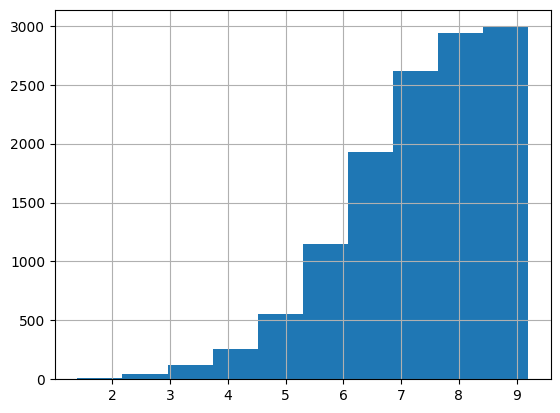

In [179]:
movies['IMDB_Rating'].hist(cumulative=True)

You can also combine with options such as `histtype` and `density`.

<AxesSubplot: >

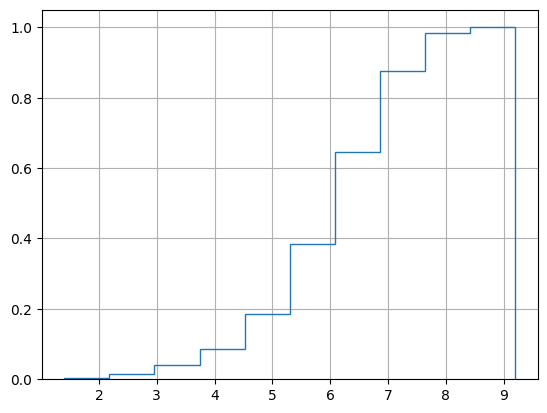

In [180]:
movies['IMDB_Rating'].hist(histtype='step', cumulative=True, density=True)

And increase the number of bins. 

<AxesSubplot: >

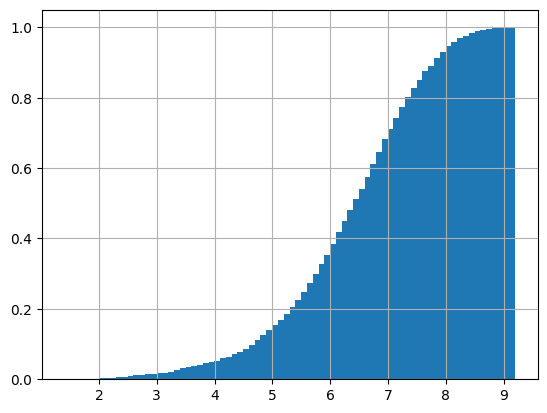

In [181]:
movies['IMDB_Rating'].hist(cumulative=True, density=True, bins=1000)

This method works fine. By increasing the number of bins, you can get a CDF in the resolution that you want. But let's also try it manually to better understand what's going on. First, we should sort all the values. 

In [182]:
rating_sorted = movies['IMDB_Rating'].sort_values()
rating_sorted.head()

1247    1.4
406     1.5
1754    1.6
1590    1.7
1515    1.7
Name: IMDB_Rating, dtype: float64

We need to know the number of data points, 

In [183]:
N = len(rating_sorted)
N

2988

And I think this may be useful for you. 

In [184]:
n = 50
np.linspace(1/n, 1.0, num=n)

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

**Q: now you're ready to draw a proper CDF. Draw the CDF plot of this data.** 

(array([6.69344043e-04, 1.67336011e-03, 1.67336011e-03, 2.34270415e-03,
        3.01204819e-03, 6.02409639e-03, 7.36278447e-03, 1.13788487e-02,
        1.40562249e-02, 1.60642570e-02, 1.84069612e-02, 2.07496653e-02,
        3.14591700e-02, 3.54752343e-02, 4.14993307e-02, 4.48460509e-02,
        5.32128514e-02, 6.25836680e-02, 7.06157965e-02, 8.60107095e-02,
        9.77242303e-02, 1.25836680e-01, 1.40896921e-01, 1.69344043e-01,
        1.84069612e-01, 2.26238286e-01, 2.74096386e-01, 2.99866131e-01,
        3.52744311e-01, 3.84538153e-01, 4.48795181e-01, 4.79919679e-01,
        5.41834003e-01, 6.12449799e-01, 6.46921017e-01, 7.10174029e-01,
        7.43641232e-01, 8.00535475e-01, 8.27309237e-01, 8.75836680e-01,
        8.91231593e-01, 9.30388220e-01, 9.57496653e-01, 9.68875502e-01,
        9.83935743e-01, 9.88286479e-01, 9.93975904e-01, 9.96653280e-01,
        9.98995984e-01, 1.00000000e+00]),
 array([1.4  , 1.556, 1.712, 1.868, 2.024, 2.18 , 2.336, 2.492, 2.648,
        2.804, 2.96 , 3

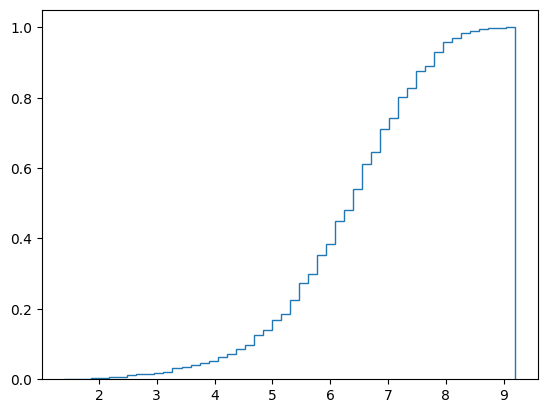

In [192]:
# TODO Implement
plt.hist(rating_sorted, n,  histtype='step', cumulative=True, density=True)

## A bit more histogram with altair

As you may remember, you can get a pandas dataframe from `vega_datasets` package and use it to create visualizations. But, if you use `altair`, you can simply pass the URL instead of the actual data. 

In [193]:
vega_datasets.data.movies.url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/movies.json'

In [194]:
# Choose based on your environment
#alt.renderers.enable('notebook')
alt.renderers.enable('jupyterlab')
#alt.renderers.enable('default')

RendererRegistry.enable('jupyterlab')

As mentioned before, in `altair` histogram is not special. It is just a plot that use bars (`mark_bar()`) where X axis is defined by `IMDB_Rating` with bins (`bin=True`), and Y axis is defined by `count()` aggregation function. 

In [195]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=True),
    alt.Y('count()')
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Have you noted that it is `IMDB_Rating:Q` not `IMDB_Rating`? This is a shorthand for

In [196]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X('IMDB_Rating', type='quantitative', bin=True),
    alt.Y(aggregate='count', type='quantitative')
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In altair, you want to specify the data types using one of the four categories: quantitative, ordinal, nominal, and temporal. https://altair-viz.github.io/user_guide/encoding.html#data-types

Although you can adjust the bins in `altair`, it does not encourage you to set the bins directly. For instance, although there is `step` parameter that directly sets the bin size, there are parameters such as `maxbins` (maximum number of bins) or `minstep` (minimum allowable step size), or `nice` (attemps to make the bin boundaries more human-friendly), that encourage you not to specify the bins directly. 

In [197]:
from altair import Bin

alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(step=0.09)),
    alt.Y('count()')
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [198]:
alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### Composing charts in altair

`altair` has a very nice way to compose multiple plots. Two histograms side by side? just do the following.

In [199]:
chart1 = alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(step=0.1)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)
chart2 = alt.Chart(vega_datasets.data.movies.url).mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)

In [200]:
chart1 | chart2

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [201]:
alt.hconcat(chart1, chart2)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Vertical commposition? 

In [202]:
alt.vconcat(chart1, chart2)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [203]:
chart1 & chart2

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Shall we avoid some repetitions? You can define a *base* empty chart first and then assign encodings later when you put together multiple charts together. Here is an example: https://altair-viz.github.io/user_guide/compound_charts.html#repeated-charts



Use base chart to produce the chart above:

In [208]:
base = alt.Chart().mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
).properties(
    width=300,
    height=150
)

chart = alt.vconcat(data=vega_datasets.data.movies.url)
for bin_param in [Bin(step=0.1), Bin(nice=True, maxbins=20)]:
    row = alt.hconcat()
    row |= base.encode(x=alt.X("IMDB_Rating:Q", bin=bin_param), y='count()')
    chart &= row

chart

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


**Q: Using the base chart approach to create a 2x2 chart where the top row shows the two histograms of `IMDB_Rating` with `maxbins`=10 and 50 respectively, and the bottom row shows another two histograms of `IMDB_Votes` with `maxbins`=10 and 50.**

In [214]:
# TODO
base = alt.Chart().mark_bar().encode(
    alt.X("IMDB_Rating:Q",  bin=Bin(nice=True, maxbins=20)),
    alt.Y('count()')
).properties(
    width=300,
    height=200
)

chart = alt.vconcat(data=vega_datasets.data.movies.url)
for bin_param in [Bin(maxbins=10), Bin(maxbins=50)]:
    row = alt.hconcat()
    row |= base.encode(x=alt.X("IMDB_Rating:Q", bin=bin_param), y='count()')
    row &= base.encode(x=alt.X("IMDB_Votes:Q", bin=bin_param), y='count()')
    chart |= row

chart

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html
